In [1]:
import nltk

In [2]:
import pandas as pd

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
messages=pd.read_csv('messages.csv')

In [4]:
messages

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are researching the differin...      0  
4     earlier this morning i was on the phone with a...      0  
...                                                 ...    ...  
2888  hello thanks for stopping by ! ! we have taken...      1  
2889  the list owner of : " kiddin " has invited you...      1  
2890  judging from the return post , i must have sou...      0  
2891  gotcha ! there are two separate fallacies in t...      0  
2892  hello ! i ' m working on a thesis concerning a...      0  

[2893 rows x 3 columns]

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
messages.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [7]:
messages.fillna('Not_Available', inplace=True)

In [8]:
messages.isnull().sum()

subject    0
message    0
label      0
dtype: int64

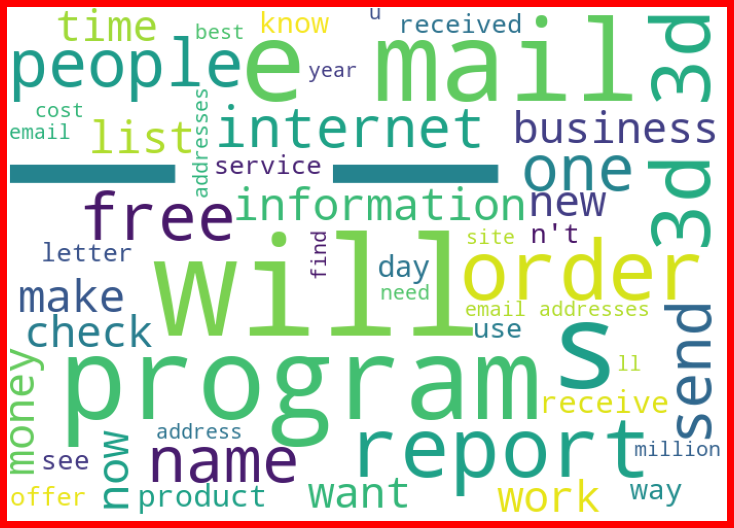

In [13]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = messages['message'][messages['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

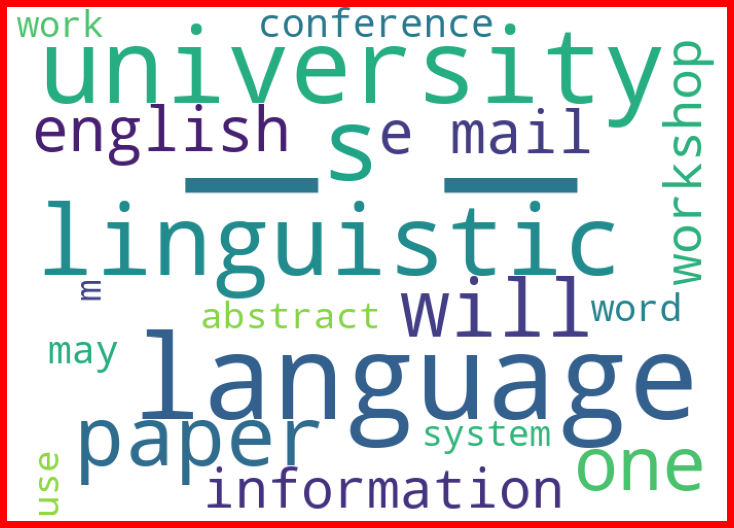

In [14]:
hams = messages['message'][messages['label']==0]

ham_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

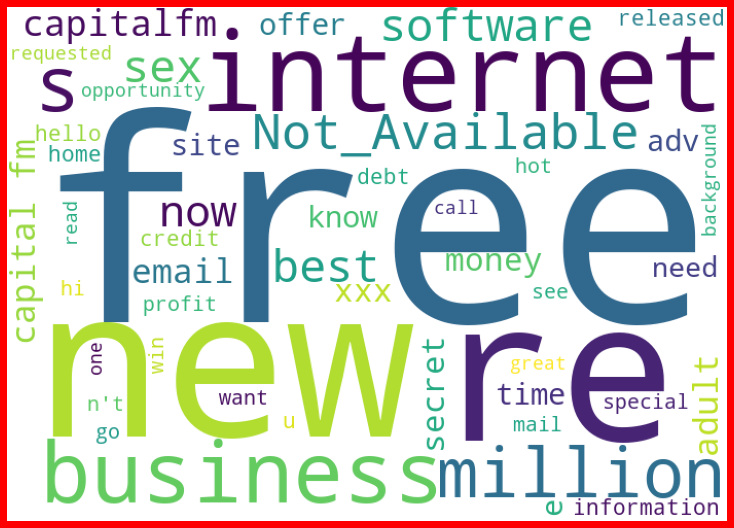

In [16]:
spams_s = messages['subject'][messages['label']==1]

spam_cloud_s = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams_s))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud_s)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

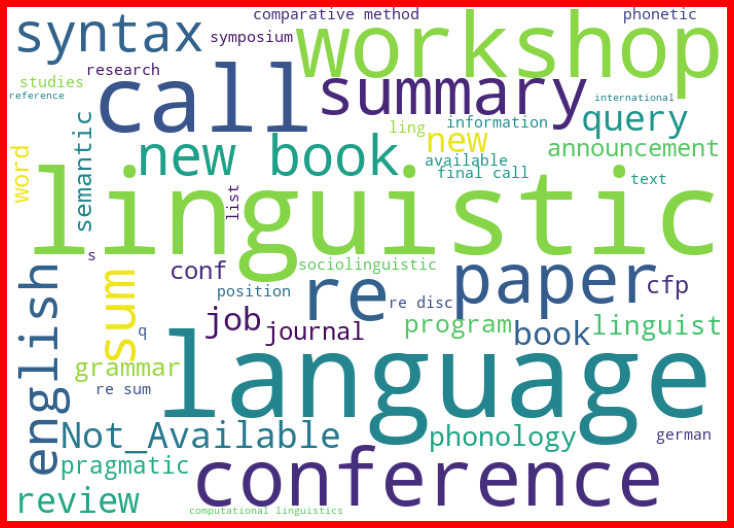

In [17]:
hams_s = messages['subject'][messages['label']==0]

ham_cloud_s = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(hams_s))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ham_cloud_s)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
spam_message_len=[len(i) for i in messages['message'][messages['label']==1]]
len(spam_message_len)

481

In [20]:
ham_message_len=[len(i) for i in messages['message'][messages['label']==0]]
len(ham_message_len)

2412

In [21]:
spam_subject_len=[len(i) for i in messages['subject'][messages['label']==1]]

In [22]:
ham_subject_len=[len(i) for i in messages['subject'][messages['label']==0]]

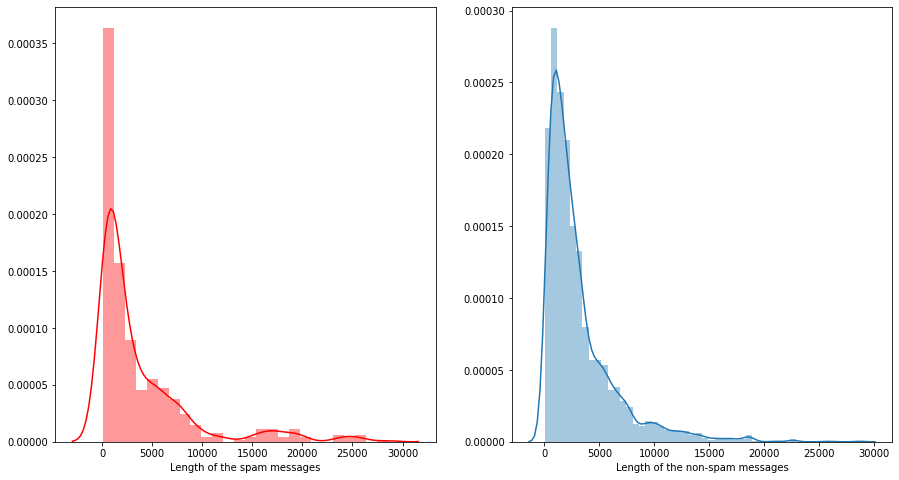

In [48]:
nu,li=plt.subplots(1,2,figsize = (15,8))
li[0]=sns.distplot(spam_message_len,axlabel='Length of the spam messages',ax=li[0],color='r')
li[1]=sns.distplot(ham_message_len,axlabel='Length of the non-spam messages',ax=li[1])
plt.show()

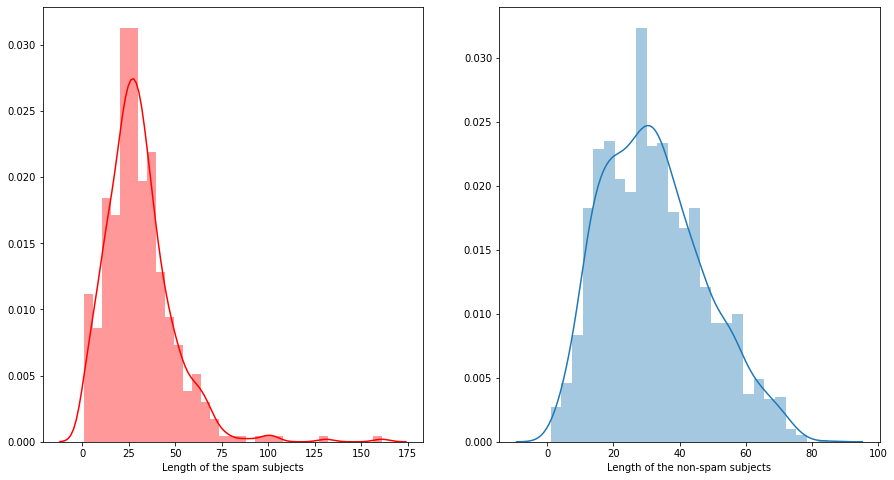

In [49]:
nu,li=plt.subplots(1,2,figsize = (15,8))
li[0]=sns.distplot(spam_subject_len,axlabel='Length of the spam subjects',ax=li[0],color='r')
li[1]=sns.distplot(ham_subject_len,axlabel='Length of the non-spam subjects',ax=li[1])
plt.show()

In [50]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [51]:
corpus=[]
for i in range(len(messages)):
    r=re.sub('[^a-zA-Z0-9]',' ',messages['message'][i])
    r=r.lower()
    r=r.split()
    r=[wordnet.lemmatize(k) for k in r if k not in set(stopwords.words('english'))]
    r=' '.join(r)
    corpus.append(r)

In [52]:
corpus_sub=[]
for j in range(len(messages)):
    r=re.sub('[^a-zA-Z]',' ',str(messages['subject'][j]))
    r=r.lower()
    r=r.split()
    r=[wordnet.lemmatize(k) for k in r if k not in set(stopwords.words('english'))]
    r=' '.join(r)
    corpus_sub.append(r)

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdfV=TfidfVectorizer(max_features=700)
x_m=TfIdfV.fit_transform(corpus).toarray()

In [72]:
TfIdfV=TfidfVectorizer(max_features=200)
x_s=TfIdfV.fit_transform(corpus_sub).toarray()

In [ ]:
x=np.concatenate((x_m,x_s),axis=1)

In [73]:
x_m.shape

(2893, 700)

In [74]:
x_s.shape

(2893, 200)

In [75]:
x=np.concatenate((x_m,x_s),axis=1)

In [76]:
x.shape

(2893, 900)

In [77]:
y=messages['label']

In [78]:
type(y[0])

numpy.int64

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [113]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB()
spam_detect_model.fit(X_train,y_train)
y_pred=spam_detect_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,f1_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[611   1]
 [  4 108]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       612
           1       0.99      0.96      0.98       112

    accuracy                           0.99       724
   macro avg       0.99      0.98      0.99       724
weighted avg       0.99      0.99      0.99       724

0.9773755656108598


No Skill: ROC AUC=0.500
MNB: ROC AUC=1.000


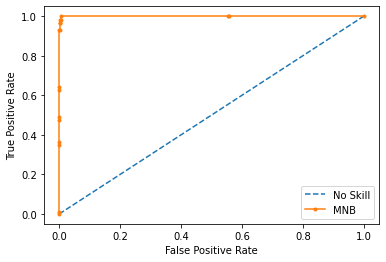

In [114]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = spam_detect_model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]


ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MNB: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
fig, ax = plt.subplots()
ax.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax.plot(lr_fpr, lr_tpr, marker='.', label='MNB')
# axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
# show the legend
plt.legend()
# show the plot
plt.show()

MNB: f1=0.977 auc=0.999


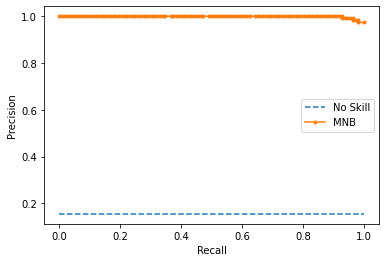

In [118]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
lr_probs = spam_detect_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = spam_detect_model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('MNB: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
fig, ax = plt.subplots()
ax.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax.plot(lr_recall, lr_precision, marker='.', label='MNB')
# axis labels
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
# show the legend
ax.legend()
# show the plot
plt.show()

In [119]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(spam_detect_model, x, y, cv=5, scoring='f1_macro')

In [120]:
scores

array([0.97543383, 0.98729985, 0.95743538, 0.97840924, 0.98470276])